In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the dataset
traindf = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
testdf = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
traindf.shape, testdf.shape

((8693, 14), (4277, 13))

### EDA on train data

In [4]:
#function defination
def Univariate(df, feature):
    if (df[feature].nunique())<20:
        print("The no of Unique values in {} are {}".format(feature,df[feature].nunique()))
        sns.countplot(x=feature, data=df)
        #plt.show()
    else:
        print("The no of Unique values in {} are {}".format(feature,df[feature].nunique()))
    

In [5]:
traindf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
traindf.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
Univariate(traindf, 'PassengerId')

The no of Unique values in PassengerId are 8693


The no of Unique values in HomePlanet are 3


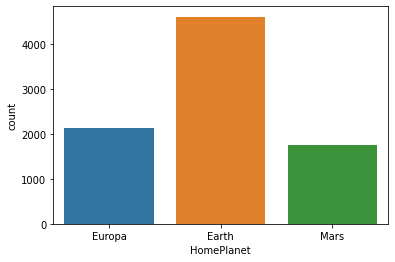

In [9]:
Univariate(traindf, 'HomePlanet')

The no of Unique values in CryoSleep are 2


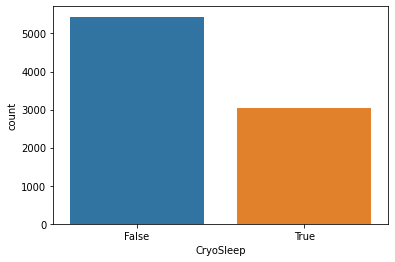

In [10]:
Univariate(traindf, 'CryoSleep')

In [11]:
Univariate(traindf, 'Cabin')

The no of Unique values in Cabin are 6560


The no of Unique values in Destination are 3


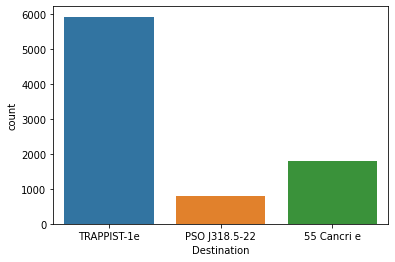

In [12]:
Univariate(traindf, 'Destination')

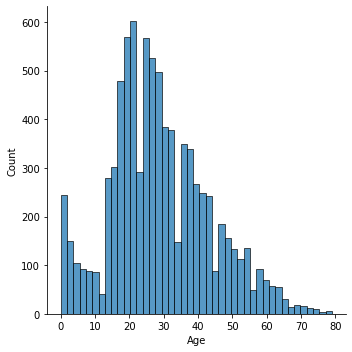

In [13]:
sns.displot(x='Age', data=traindf)
plt.show()

The no of Unique values in VIP are 2


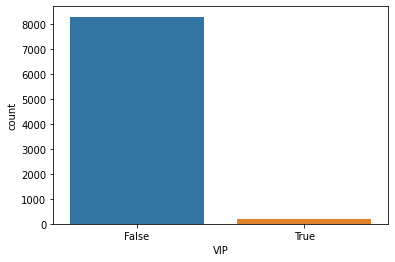

In [14]:
Univariate(traindf, 'VIP')

In [15]:
Univariate(traindf, 'RoomService')

The no of Unique values in RoomService are 1273


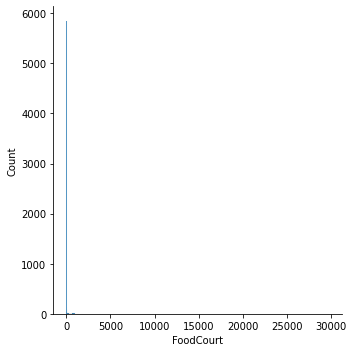

In [16]:
sns.displot(x='FoodCourt', data=traindf)
plt.show()

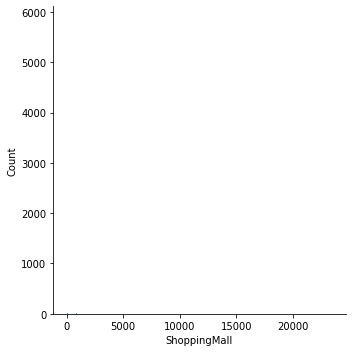

In [17]:
sns.displot(x='ShoppingMall', data=traindf)
plt.show()

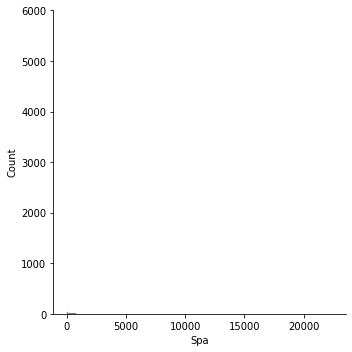

In [18]:
sns.displot(x='Spa', data=traindf)
plt.show()

In [19]:
Univariate(traindf, 'Name')

The no of Unique values in Name are 8473


The no of Unique values in Transported are 2


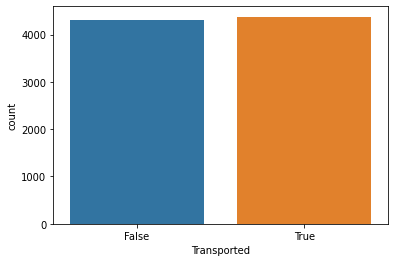

In [20]:
Univariate(traindf, 'Transported')

The data is balanced, this is good sign, no need for tackling class imbalance

### EDA testdf

In [21]:
testdf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [22]:
Univariate(testdf,'PassengerId')

The no of Unique values in PassengerId are 4277


The no of Unique values in HomePlanet are 3


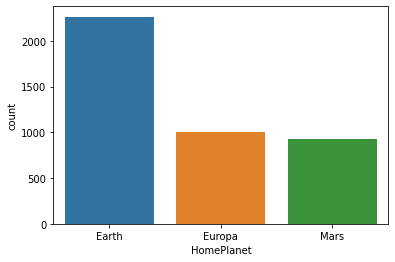

In [23]:
Univariate(testdf,'HomePlanet')

The no of Unique values in CryoSleep are 2


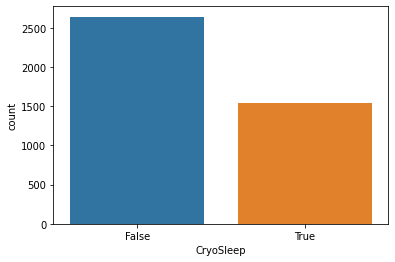

In [24]:
Univariate(testdf,'CryoSleep')

In [25]:
Univariate(testdf,'Cabin')

The no of Unique values in Cabin are 3265


The no of Unique values in Destination are 3


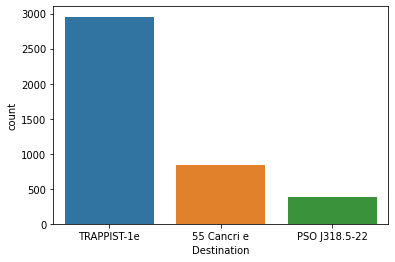

In [26]:
Univariate(testdf,'Destination')

In [27]:
Univariate(testdf,'Age')

The no of Unique values in Age are 79


The no of Unique values in VIP are 2


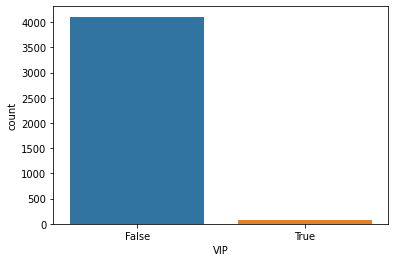

In [28]:
Univariate(testdf,'VIP')

In [29]:
Univariate(testdf,'RoomService')

The no of Unique values in RoomService are 842


In [30]:
Univariate(testdf,'FoodCourt')

The no of Unique values in FoodCourt are 902


In [31]:
Univariate(testdf,'ShoppingMall')

The no of Unique values in ShoppingMall are 715


In [32]:
Univariate(testdf,'Spa')

The no of Unique values in Spa are 833


In [33]:
Univariate(testdf,'VRDeck')

The no of Unique values in VRDeck are 796


In [34]:
Univariate(testdf,'Name')

The no of Unique values in Name are 4176
